In [38]:
import utils
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

## Objective

Does patient position metadata correlate with vertebrea fracture type. In this example I am analyzing records with only one fracture.

In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train["fracture_count"] = df_train.apply(lambda x: sum(x[2:]), axis=1)

In [7]:
df_train["fracture_count"].unique()

array([2, 1, 0, 3, 5, 4, 6])

In [8]:
df_frac_one = df_train[df_train["fracture_count"]==1]

In [9]:
df_frac_one["vertebrea"] = df_frac_one.apply(lambda x: np.argmax(x[2:])+1, axis=1)

/tmp/ipykernel_2105/2009875273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frac_one["vertebrea"] = df_frac_one.apply(lambda x: np.argmax(x[2:])+1, axis=1)


In [10]:
df_frac_one.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,fracture_count,vertebrea
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0,1,2
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0,1,2
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,1,5
5,1.2.826.0.1.3680043.4859,1,0,0,0,0,0,1,0,1,6
9,1.2.826.0.1.3680043.24045,1,0,0,0,0,0,0,1,1,7


In [11]:
df_frac_one["vertebrea"].unique()

array([2, 5, 6, 7, 1, 4, 3])

In [12]:
instance = "1.2.826.0.1.3680043.27262"
paths = glob.glob(f"train_images/{instance}/*.dcm")

In [13]:
import re

In [14]:
g = re.search(r"(\d+)(\.dcm)", paths[20])

In [15]:
g.groups()[0]

'117'

In [20]:
df_frac_one["slices"] = df_frac_one.apply(lambda x: [int(re.search(r"(\d+)(\.dcm)", path).groups()[0]) for path in glob.glob(f"train_images/{x[0]}/*.dcm")] , axis=1)

/tmp/ipykernel_2105/1812353146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frac_one["slices"] = df_frac_one.apply(lambda x: [int(re.search(r"(\d+)(\.dcm)", path).groups()[0]) for path in glob.glob(f"train_images/{x[0]}/*.dcm")] , axis=1)


In [21]:
df_frac_one.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,fracture_count,vertebrea,slices
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0,1,2,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107..."
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0,1,2,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107..."
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,1,5,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107..."
5,1.2.826.0.1.3680043.4859,1,0,0,0,0,0,1,0,1,6,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107..."
9,1.2.826.0.1.3680043.24045,1,0,0,0,0,0,0,1,1,7,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107..."


In [22]:
df_frac_one["slice_count"] = df_frac_one["slices"].apply(len)

/tmp/ipykernel_2105/3876003935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frac_one["slice_count"] = df_frac_one["slices"].apply(len)


<AxesSubplot:>

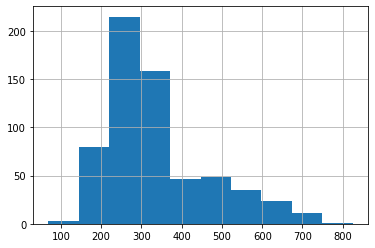

In [23]:
df_frac_one["slice_count"].hist()

In [24]:
df_frac_one[["vertebrea", "slice_count"]].corr()

,vertebrea,slice_count
vertebrea,1.00000,0.08875
slice_count,0.08875,1.00000


No correlation to slice counts and vertebrea fracture

In [25]:
df_frac_one["slices"].apply(min).unique()

array([ 1,  2, 59])

In [26]:
df_frac_one["slices_max"] = df_frac_one["slices"].apply(max)

/tmp/ipykernel_2105/1961800925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frac_one["slices_max"] = df_frac_one["slices"].apply(max)


In [28]:
df_frac_one["slices_min"] = df_frac_one["slices"].apply(min)

/tmp/ipykernel_2105/641919964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frac_one["slices_min"] = df_frac_one["slices"].apply(min)


In [29]:
df_frac_one.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,fracture_count,vertebrea,slices,slice_count,slices_max,slices_min
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0,1,2,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",406,406,1
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0,1,2,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",385,385,1
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,1,5,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",199,199,1
5,1.2.826.0.1.3680043.4859,1,0,0,0,0,0,1,0,1,6,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",310,310,1
9,1.2.826.0.1.3680043.24045,1,0,0,0,0,0,0,1,1,7,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",563,563,1


In [34]:
df_frac_one["patient_image_position"] = df_frac_one.apply(lambda x: utils.show_dcm_image(f"train_images/{x[0]}/{x[14]}.dcm")[0].ImagePositionPatient, axis=1)

/tmp/ipykernel_2105/2191285022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frac_one["patient_image_position"] = df_frac_one.apply(lambda x: utils.show_dcm_image(f"train_images/{x[0]}/{x[14]}.dcm")[0].ImagePositionPatient, axis=1)


In [35]:
df_frac_one.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,fracture_count,vertebrea,slices,slice_count,slices_max,slices_min,patient_image_position
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0,1,2,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",406,406,1,"[-79.92172, -23.28110, 1930.50]"
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0,1,2,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",385,385,1,"[-40.854, -42.290, -13.363]"
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,1,5,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",199,199,1,"[-149.2080078125, -350.2080078125, 54]"
5,1.2.826.0.1.3680043.4859,1,0,0,0,0,0,1,0,1,6,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",310,310,1,"[-70.500, -13.500, -26.250]"
9,1.2.826.0.1.3680043.24045,1,0,0,0,0,0,0,1,1,7,"[1, 10, 100, 101, 102, 103, 104, 105, 106, 107...",563,563,1,"[-115.0093, -52.50931, 2048.50]"


<AxesSubplot:>

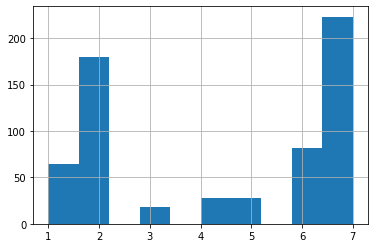

In [108]:
df_frac_one.vertebrea.hist()

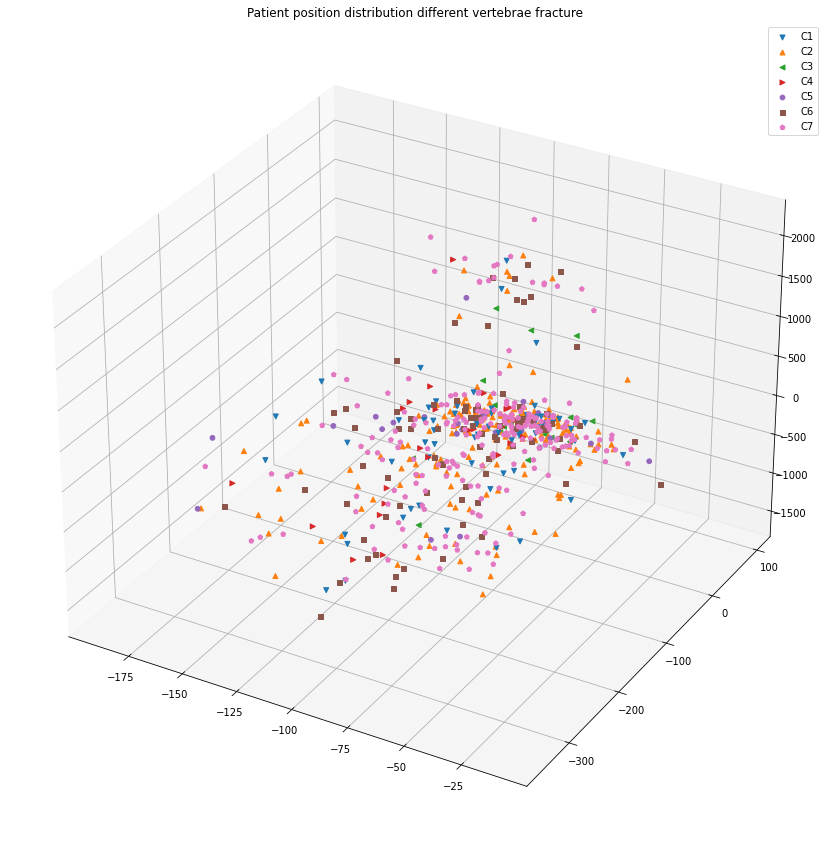

In [116]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
sample = None
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
labels = []
for i in sorted(df_frac_one.vertebrea.unique()):
    labels.append(f"C{i}")
    values = df_frac_one[df_frac_one.vertebrea == i]["patient_image_position"].apply(lambda x: np.array([float(i) for i in x])).values
    position = np.concatenate(values).reshape(len(values),3)
    ax.scatter(position[:,0], position[:,1], position[:,2], marker=markers[i], s=25, alpha=1)
    ax.legend(labels=labels)
    ax.set_title("Patient position distribution different vertebrae fracture")
    # print(values.shape)
    # sample = values

In [118]:
df_frac_one[["vertebrea", "slice_count", "slices_max", "slices_min"]].corr()

,vertebrea,slice_count,slices_max,slices_min
vertebrea,1.000000,0.088750,0.088004,-0.042304
slice_count,0.088750,1.000000,0.999832,-0.027397
slices_max,0.088004,0.999832,1.000000,-0.009074
slices_min,-0.042304,-0.027397,-0.009074,1.000000


## Conclusion

Most patent position in the first slice has similar distribution for all vertebrea